# Pokemon type Clustering

## 1. Main objectives

Data has been obtained from https://www.kaggle.com/abcsds/pokemon

## 2. Description of the data

In [191]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

filepath = 'Pokemon.csv'

data = pd.read_csv(filepath, sep = ',')

data.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


Each column corresponds to the following:

**Number**: The ID for each pokemon

**Name**: The name of each pokemon

**Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks

**Type 2**: Some pokemon are dual type and have 2

**Total**: Sum of all stats that come after this, a general guide to how strong a pokemon is

**HP**: Hit points, or health, defines how much damage a pokemon can withstand before fainting

**Attack**: The base modifier for normal attacks (eg. Scratch, Punch)

**Defense**: The base damage resistance against normal attacks

**SP Atk**: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

**SP Def**: Special defense, the base damage resistance against special attacks

**Speed**: Determines which pokemon attacks first each round

**Generation**: The generation of games where the pokemon was first introduced

**Legendary**: Some pokemon are much rarer than others, and are dubbed "legendary"

**Inspiration: The type of a pokemon cannot be inferred only by its Attack and Defense. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.**

In [192]:
data.shape

(1072, 13)

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


## 3. Feature engineering

In [194]:
data['type2'].isnull().sum()

498

In [195]:
data['type2'] = data['type2'].replace(np.nan, 'None')
data['type2'].unique() #shan reemplaçat

array(['Poison', 'None', 'Flying', 'Dragon', 'Water', 'Normal', 'Psychic',
       'Steel', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice',
       'Dark', 'Ghost', 'Rock', 'Fire', 'Bug'], dtype=object)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       1072 non-null   object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


we will need to one-hot-encode the type 1 and type 2 data. The name of the pokemon will be removed.

In [197]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data = data.drop(['name', 'number'], axis = 1)

obj_cols = [x for x in data.columns if x in ['type1', 'type2', 'legendary']]
float_cols = [x for x in data.columns if x not in ['type1', 'type2', 'legendary']]

for col in obj_cols:
    data[col] = le.fit_transform(data[col])

In [198]:
data['type2'].unique()

array([14, 12,  7,  2, 18, 13, 15, 17, 10,  4,  9,  5,  3, 11,  1,  8, 16,
        6,  0])

Now we drop the ID column.

In [199]:
df = data.copy()

Let's first take a look to the correlations:

In [200]:
corr_mat = df.corr()

for x in range(len(float_cols)):
    corr_mat.iloc[x,x] = 0

corr_mat.abs().idxmax()

type1            defense
type2          sp_attack
total             attack
hp                 total
attack             total
defense            total
sp_attack          total
sp_defense         total
speed              speed
generation    generation
legendary      legendary
dtype: object

In [201]:
skew_columns = df[float_cols].skew().sort_values(ascending = False)

# mirem quins tenen l'skew major de 0.75, i que per tant hauran de ser retocats.
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

hp            1.760494
defense       1.143146
sp_defense    0.926515
dtype: float64

In [202]:
for col in skew_columns.index:
    data[col] = np.log1p(data[col])

In [203]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data[float_cols] = sc.fit_transform(data[float_cols])

data.head(2)

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,11,14,0.150526,0.646223,0.237838,0.567873,0.298913,0.461574,0.205128,0.125,0
1,11,14,0.242105,0.704391,0.308108,0.633990,0.380435,0.544121,0.282051,0.125,0


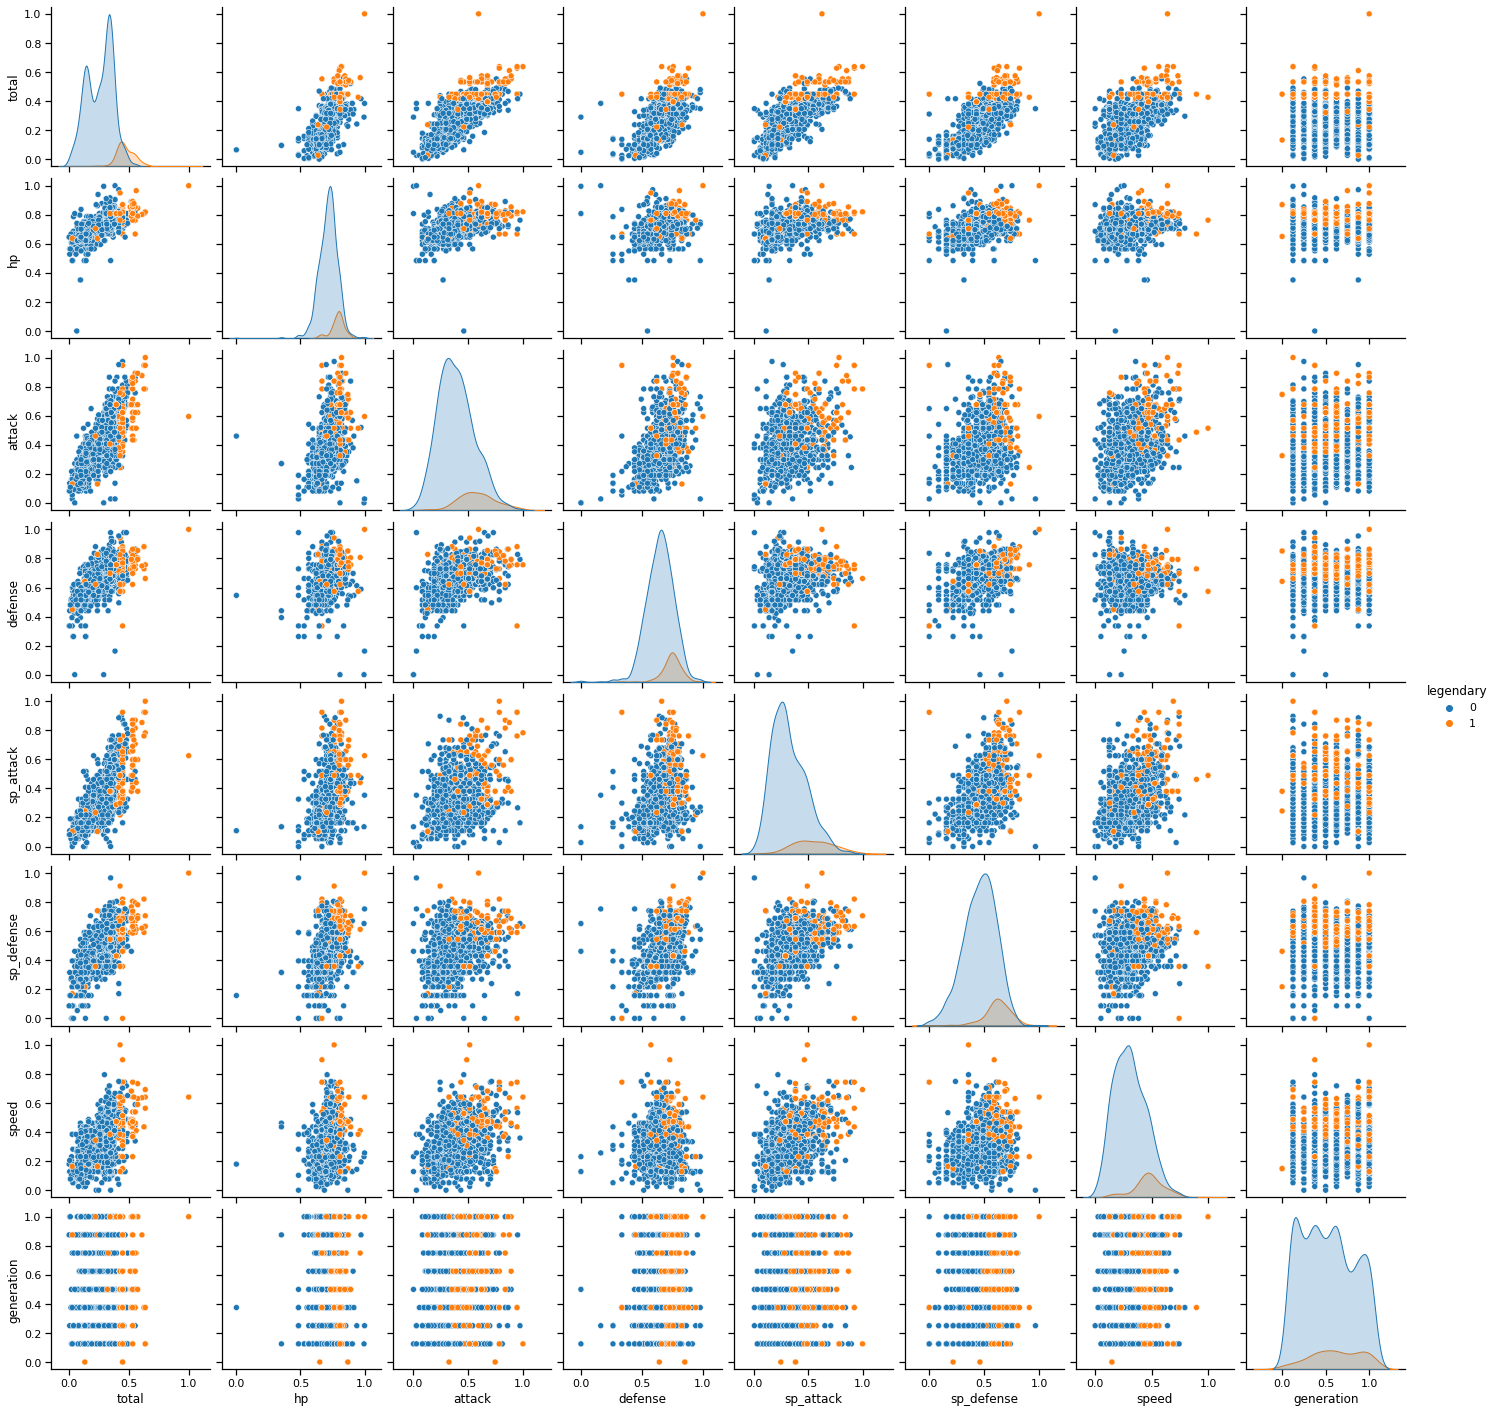

In [204]:
sns.set_context('notebook')
sns.pairplot(data[float_cols + ['legendary']], hue = 'legendary')

## 4. Three variations of unsupervised model (Clustering)

### 4.1 K-means

In [205]:
from sklearn.cluster import KMeans
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state= 42)
    km = km.fit(df[float_cols])
    km_list.append(pd.Series({'clusters': clust, 'inertia':km.inertia_, 'model': km}))    

In [206]:
plot_data = pd.concat(km_list, axis = 1).T
plot_data = plot_data[['clusters', 'inertia']].set_index('clusters')
plot_data.head(4)

,inertia
clusters,
1,2.16755e+07
2,8.95904e+06
3,6.05867e+06
4,5.03206e+06


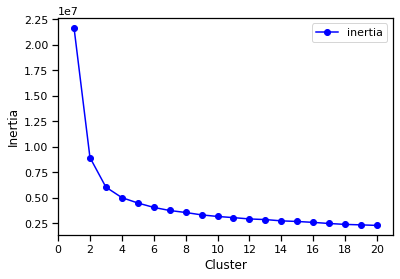

In [207]:
ax = plot_data.plot(marker = 'o', color = 'blue')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

### 4.2 Agglomerative Clustering

In [275]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
agg = agg.fit(df[float_cols])

# fem igual que abans una nova columna amb els labels dels clusters
data['agg'] = agg.fit_predict(df[float_cols])

data

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,agg
0,11,14,0.150526,0.646223,0.237838,0.567873,0.298913,0.461574,0.205128,0.125,0,5
1,11,14,0.242105,0.704391,0.308108,0.633990,0.380435,0.544121,0.282051,0.125,0,3
2,11,14,0.368421,0.762836,0.416216,0.706822,0.489130,0.633068,0.384615,0.125,0,0
3,11,14,0.473684,0.762836,0.513514,0.811133,0.608696,0.705892,0.384615,0.125,0,4
4,11,14,0.368421,0.762836,0.416216,0.706822,0.489130,0.633068,0.384615,0.125,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1067,13,12,0.426316,0.808316,0.756757,0.825841,0.298913,0.671122,0.128205,1.000,1,4
1068,9,12,0.426316,0.808316,0.324324,0.621131,0.733696,0.544121,0.641026,1.000,1,4
1069,16,9,0.342105,0.808316,0.405405,0.697082,0.380435,0.544121,0.384615,1.000,1,0
1070,16,11,0.531579,0.808316,0.864865,0.863895,0.407609,0.737898,0.230769,1.000,1,1


<AxesSubplot:xlabel='total', ylabel='attack'>

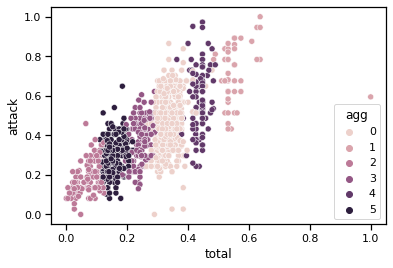

In [284]:
sns.scatterplot(data=data, x="total", y="attack", hue="agg")

### 4.3 DBSCAN

In [271]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.1, min_samples=3).fit(df[float_cols])
clustering_labels = db.fit_predict(df[float_cols])

df['labels'] = clustering_labels

###########3
#labels = db.labels_

#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)

#n_clusters_

In [272]:
df['labels'].value_counts()

-1    1050
 0       5
 5       4
 3       4
 1       3
 4       3
 2       3
Name: labels, dtype: int64

## 5. Which model is recommended?

## 6. Future suggestions